<div align="center">
    <img src="images/logo.png" width="250" height="200">
</div>

<div align="center">
    To download the previously cleaned dataset click <a href="https://drive.google.com/file/d/1mYJws7uPjbPqPszUQHpf4PfrHSEjAVIu/view?usp=sharing" target="__blank">here</a>.
</div>

In [1]:
# import packages
import numpy as np
import pandas as pd

# set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [2]:
# read the data
df = pd.read_pickle('clean_complaints.pkl')
print("Shape: ", df.shape)
df.head(3)

Shape:  (1057135, 16)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,,
3379500,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,<NA>,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,<NA>
3255455,2019-05-23,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,<NA>,Company has responded to the consumer and the ...,MIDFIRST BANK,AZ,85254,<NA>,Referral,2019-05-28,Closed with explanation,Yes,<NA>
4267123,2021-04-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,<NA>,<NA>,"EQUIFAX, INC.",PA,19403,<NA>,Web,2021-04-02,Closed with explanation,Yes,<NA>


In [3]:
# copy a small part of the dataset
# we'll use it to write useful functions
df2 = df[0:100]
df2.shape

(100, 16)

In [4]:
# there are 46 unique companies among those 100 entries
df2.Company.unique()

['Experian Information Solutions Inc.', 'MIDFIRST BANK', 'EQUIFAX, INC.', 'PENTAGON FEDERAL CREDIT UNION', 'Square Inc.', ..., 'ALLY FINANCIAL INC.', 'Alliance Data Card Services', 'SLM CORPORATION', 'Quick Bridge Funding, LLC', 'BBVA FINANCIAL CORPORATION']
Length: 46
Categories (46, object): ['Experian Information Solutions Inc.', 'MIDFIRST BANK', 'EQUIFAX, INC.', 'PENTAGON FEDERAL CREDIT UNION', ..., 'Alliance Data Card Services', 'SLM CORPORATION', 'Quick Bridge Funding, LLC', 'BBVA FINANCIAL CORPORATION']

In [5]:
# takes a dataframe and creates a new dataframe with the number of complaints for each company
def complaints_per_company(passed_df):
    complaints = pd.DataFrame({'Company Name': [], 'Number of Complaints': []})
    
    # iterate all unique companies 
    for company in passed_df.Company.unique():
        company_name = str(company)
        number_of_complaints = passed_df[passed_df['Company'] == company].shape[0]
        
        new_row = {'Company Name': company_name, 'Number of Complaints': number_of_complaints}
        complaints = complaints.append(new_row, ignore_index=True)
        
    return complaints

In [6]:
# checking first 100 entries
complaints = complaints_per_company(df2)
complaints.head()

,Company Name,Number of Complaints
0,Experian Information Solutions Inc.,13.0
1,MIDFIRST BANK,1.0
2,"EQUIFAX, INC.",9.0
3,PENTAGON FEDERAL CREDIT UNION,1.0
4,Square Inc.,1.0


In [11]:
# now we apply it to the whole dataset
complaints = complaints_per_company(df)
complaints.set_index('Company Name', inplace=True)
complaints.head()

,Number of Complaints
Company Name,
Experian Information Solutions Inc.,121215.0
MIDFIRST BANK,262.0
"EQUIFAX, INC.",131461.0
PENTAGON FEDERAL CREDIT UNION,1100.0
Square Inc.,685.0


In [12]:
# let's find top 10 companies with most complaints
complaints.sort_values(by=['Number of Complaints'], inplace=True, ascending=False)
print("Top 10 Companies with Most Complaints")
complaints.head(10)

Top 10 Companies with Most Complaints


,Number of Complaints
Company Name,
"EQUIFAX, INC.",131461.0
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",129492.0
Experian Information Solutions Inc.,121215.0
"BANK OF AMERICA, NATIONAL ASSOCIATION",62194.0
WELLS FARGO & COMPANY,51174.0
JPMORGAN CHASE & CO.,44698.0
"CITIBANK, N.A.",34284.0
CAPITAL ONE FINANCIAL CORPORATION,26390.0
Ocwen Financial Corporation,18767.0


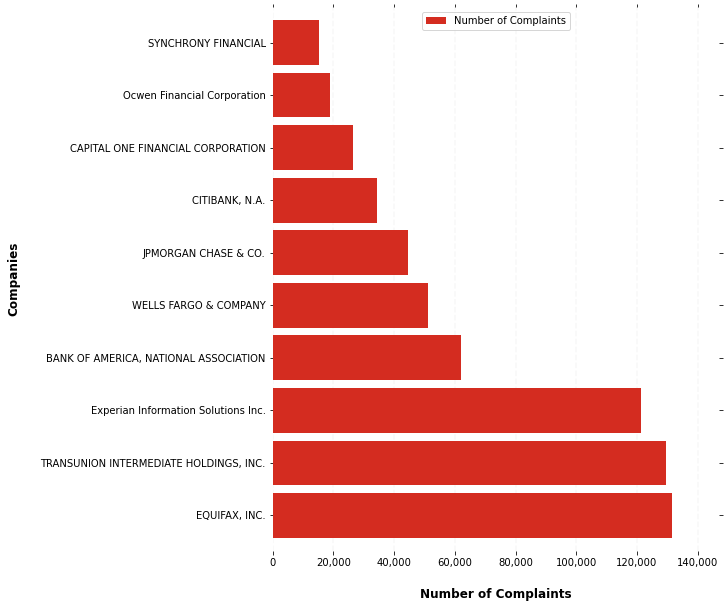

In [15]:
# build a horizontal bar chart for top companies with most complaints
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = complaints.head(10).plot(kind='barh', figsize=(8, 10), color='#d42c20', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Number of Complaints", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Companies", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))